### Data Cleaning

- Handling missing values 
- Scaling and normalization 
- Parsing dates 
- Character encodings
- Inconsistent data entry


### Handling Missing Values
#### Drop missing values, or fill them in with an automated workflow.

In [2]:
#import modules 

import pandas as pd
import numpy as np
import os

In [3]:
#read data 

input_path = ('C:/Users/ikennan/Downloads/Datasets/')

nfl = pd.read_csv(os.path.join(input_path, 'NFL Play by Play 2009-2016 (v3).csv'))

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (25,51) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
nfl.shape

(362447, 102)

In [5]:
nfl.head()

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2009-09-10,2009091000,1,1,NaN,15:00,15,3600.0,0.0,TEN,...,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,2009-09-10,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT,...,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,2009-09-10,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,...,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,2009-09-10,2009091000,1,1,3.0,13:35,14,3515.0,41.0,PIT,...,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2009-09-10,2009091000,1,1,4.0,13:27,14,3507.0,8.0,PIT,...,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009


#### How many missing data points are there?

In [6]:
missing = nfl.isnull().sum()
missing

Date             0
GameID           0
Drive            0
qtr              0
down         54218
             ...  
Win_Prob     21993
WPA           4817
airWPA      220738
yacWPA      220956
Season           0
Length: 102, dtype: int64

In [7]:
#total count of missing values?
total_cells = np.product(nfl.shape)
total_missing = missing.sum()

#percent of missing data
percent_missing = (total_missing/total_cells)*100
percent_missing

24.85847694188906

#### dropna()

In [8]:
#remove all rows that contain missing data (NaN)
nfl.dropna()

#all data removed because every row had at least 1 NaN

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season


In [9]:
#remove all columns with at least 1 NaN 
dropna_columns = nfl.dropna(axis=1)
dropna_columns.head()

,Date,GameID,Drive,qtr,TimeUnder,ydstogo,ydsnet,PlayAttempted,Yards.Gained,sp,...,Timeout_Indicator,Timeout_Team,posteam_timeouts_pre,HomeTimeouts_Remaining_Pre,AwayTimeouts_Remaining_Pre,HomeTimeouts_Remaining_Post,AwayTimeouts_Remaining_Post,ExPoint_Prob,TwoPoint_Prob,Season
0,2009-09-10,2009091000,1,1,15,0,0,1,39,0,...,0,None,3,3,3,3,3,0.0,0.0,2009
1,2009-09-10,2009091000,1,1,15,10,5,1,5,0,...,0,None,3,3,3,3,3,0.0,0.0,2009
2,2009-09-10,2009091000,1,1,15,5,2,1,-3,0,...,0,None,3,3,3,3,3,0.0,0.0,2009
3,2009-09-10,2009091000,1,1,14,8,2,1,0,0,...,0,None,3,3,3,3,3,0.0,0.0,2009
4,2009-09-10,2009091000,1,1,14,8,2,1,0,0,...,0,None,3,3,3,3,3,0.0,0.0,2009


In [10]:
#how many columns were dropped?
og_columns = nfl.shape[1]
dropped_columns = dropna_columns.shape[1]

print('original:', og_columns, 'dropped:', dropped_columns)

original: 102 dropped: 41


#### filling missing values automatically

In [11]:
#subset of nfl data 
nfl_subset = nfl.loc[:, 'EPA':'Season'].head()
nfl_subset

,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,NaN,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,-1.402760,NaN,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2.097796,NaN,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009


#### fillna()

In [12]:
#fillna() is used to fill in missing values 
#replace all NAs with 0 

nfl_subset.fillna(0)

,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,0.000000,0.000000,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,0.000000,0.000000,2009
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,-1.402760,0.000000,0.000000,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,0.000000,0.000000,2009
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2.097796,0.000000,0.000000,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,0.000000,0.000000,2009


In [13]:
#for datasets that have some sort of logical order, missing values can be replaced with whatever value comes directly after it
nfl_subset.fillna(method='backfill', axis=0).fillna(0) #replace remaining NAs with 0

,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,-1.068169,1.146076,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,-0.032244,0.036899,2009
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,-1.402760,3.318841,-5.031425,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,0.106663,-0.156239,2009
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2.097796,0.000000,0.000000,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,0.000000,0.000000,2009


### Scaling and Normalization 

In [14]:
!pip install mlxtend

#for box-cox transformation - transforms our data so that it closely resembles a normal distribution (normalization)
from scipy import stats 

#for min-max scaling (scaling)
from mlxtend.preprocessing import minmax_scaling

#plotting modules 
import seaborn as sns 
import matplotlib.pyplot as plt 


You should consider upgrading via the 'c:\programdata\anaconda3\python.exe -m pip install --upgrade pip' command.


#### in scaling, you're changing the range of your data, while
#### in normalization, you're changing the shape of the distribution of your data.


(1000,)

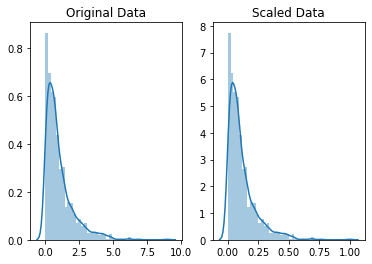

In [61]:
#scaling - transform data so it fits within a specific scale e.g. 0-100, 0-1

#generate 1000 data points randomly from an exponential distribution

og_data = np.random.exponential(size=1000)

#min-max scale the data between 0 and 1
scaled_data = minmax_scaling(og_data, columns=[0])

#plot both together to compare 
fig, ax = plt.subplots(1,2)
sns.distplot(og_data, ax=ax[0])
ax[0].set_title('Original Data')
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title('Scaled Data')


og_data.shape



Notice that the shape of the data doesn't change, but that instead of ranging from 0 to 8ish, it now ranges from 0 to 1.

The point of normalization is to change your observations so that they can be described as a normal distribution.

Text(0.5, 1.0, 'Normalized Data')

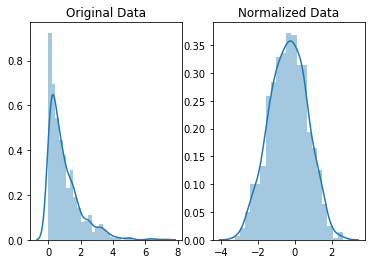

In [55]:
#normalize the exponential data with box-cox 
normalized_data = stats.boxcox(og_data)

normalized_data
#plot both together to compare 
fig, ax=plt.subplots(1,2)
sns.distplot(og_data, ax=ax[0])
ax[0].set_title('Original Data')
sns.distplot(normalized_data[0], ax=ax[1])
ax[1].set_title('Normalized Data')



Notice that the shape of our data has changed. Before normalizing it was almost L-shaped. But after normalizing it looks more like the outline of a bell (hence "bell curve").

In [81]:
x = nfl_subset.EPA > 0

y = nfl_subset.EPA.loc[x]
y

n = stats.boxcox(y)[0]
n
#y = pd.DataFrame(nfl_subset.EPA)
#y


array([ 0.88874393, -1.23951066,  0.95373471])

### Parsing Dates
#### Help Python recognize dates as composed of day, month, and year.

In [82]:
import datetime

In [89]:
input_path = ('C:/Users/ikennan/Downloads/Datasets/')
file = 'catalog.csv'

landslides_data = pd.read_csv(os.path.join(input_path, file))
landslides_data.head()

,id,date,time,continent_code,country_name,country_code,state/province,population,city/town,distance,...,geolocation,hazard_type,landslide_type,landslide_size,trigger,storm_name,injuries,fatalities,source_name,source_link
0,34,3/2/07,Night,NaN,United States,US,Virginia,16000,Cherry Hill,3.40765,...,"(38.600900000000003, -77.268199999999993)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,NBC 4 news,http://www.nbc4.com/news/11186871/detail.html
1,42,3/22/07,NaN,NaN,United States,US,Ohio,17288,New Philadelphia,3.33522,...,"(40.517499999999998, -81.430499999999995)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,Canton Rep.com,http://www.cantonrep.com/index.php?ID=345054&C...
2,56,4/6/07,NaN,NaN,United States,US,Pennsylvania,15930,Wilkinsburg,2.91977,...,"(40.4377, -79.915999999999997)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,The Pittsburgh Channel.com,https://web.archive.org/web/20080423132842/htt...
3,59,4/14/07,NaN,NaN,Canada,CA,Quebec,42786,Châteauguay,2.98682,...,"(45.322600000000001, -73.777100000000004)",Landslide,Riverbank collapse,Small,Rain,NaN,NaN,NaN,Le Soleil,http://www.hebdos.net/lsc/edition162007/articl...
4,61,4/15/07,NaN,NaN,United States,US,Kentucky,6903,Pikeville,5.66542,...,"(37.432499999999997, -82.493099999999998)",Landslide,Landslide,Small,Downpour,NaN,NaN,0.0,Matthew Crawford (KGS),NaN


In [86]:
#check datatype of date column 
landslides_data.date.dtype

dtype('O')

#### Convert date column to datetime

In [91]:
#create a new column - date_parsed, with the parsed dates 
landslides_data['date_parsed'] = pd.to_datetime(landslides_data.date, format='%m/%d/%y')

landslides_data

,id,date,time,continent_code,country_name,country_code,state/province,population,city/town,distance,...,hazard_type,landslide_type,landslide_size,trigger,storm_name,injuries,fatalities,source_name,source_link,date_parsed
0,34,3/2/07,Night,NaN,United States,US,Virginia,16000,Cherry Hill,3.40765,...,Landslide,Landslide,Small,Rain,NaN,NaN,NaN,NBC 4 news,http://www.nbc4.com/news/11186871/detail.html,2007-03-02
1,42,3/22/07,NaN,NaN,United States,US,Ohio,17288,New Philadelphia,3.33522,...,Landslide,Landslide,Small,Rain,NaN,NaN,NaN,Canton Rep.com,http://www.cantonrep.com/index.php?ID=345054&C...,2007-03-22
2,56,4/6/07,NaN,NaN,United States,US,Pennsylvania,15930,Wilkinsburg,2.91977,...,Landslide,Landslide,Small,Rain,NaN,NaN,NaN,The Pittsburgh Channel.com,https://web.archive.org/web/20080423132842/htt...,2007-04-06
3,59,4/14/07,NaN,NaN,Canada,CA,Quebec,42786,Châteauguay,2.98682,...,Landslide,Riverbank collapse,Small,Rain,NaN,NaN,NaN,Le Soleil,http://www.hebdos.net/lsc/edition162007/articl...,2007-04-14
4,61,4/15/07,NaN,NaN,United States,US,Kentucky,6903,Pikeville,5.66542,...,Landslide,Landslide,Small,Downpour,NaN,NaN,0.0,Matthew Crawford (KGS),NaN,2007-04-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1688,7535,12/7/15,NaN,NaN,United States,US,North Carolina,1646,Tryon,7.80866,...,Landslide,Rockfall,Small,NaN,NaN,0.0,0.0,Tryon Daily Bulletin,http://www.tryondailybulletin.com/2016/02/26/u...,2015-12-07
1689,7537,2/22/16,0:00,NaN,United States,US,West Virginia,51400,Charleston,6.84721,...,Landslide,Mudslide,Small,Unknown,NaN,0.0,0.0,Charleston Gazette,http://www.wvgazettemail.com/news/20160222/us-...,2016-02-22
1690,7539,2/23/16,NaN,NaN,United States,US,West Virginia,2406,Welch,14.19735,...,Landslide,Landslide,Small,Rain,NaN,0.0,0.0,Bluefield Daily Telegraph,http://www.bdtonline.com/news/officials-cautio...,2016-02-23
1691,7540,2/26/16,21:06,NaN,United States,US,West Virginia,1048,Athens,12.00678,...,Landslide,Rockfall,Small,Unknown,NaN,0.0,0.0,Bluefield Daily Telegraph,http://www.bdtonline.com/news/rockslide-snarls...,2016-02-26


In [94]:
landslides_data.date_parsed.head()

0   2007-03-02
1   2007-03-22
2   2007-04-06
3   2007-04-14
4   2007-04-15
Name: date_parsed, dtype: datetime64[ns]

#### Select the day of the month 

In [95]:
#get day of month from date_parsed column 

day_of_month = landslides_data.date_parsed.dt.day 
day_of_month.head()

0     2.0
1    22.0
2     6.0
3    14.0
4    15.0
Name: date_parsed, dtype: float64

In [96]:
landslides_data.date.str.len()

0       6.0
1       7.0
2       6.0
3       7.0
4       7.0
       ... 
1688    7.0
1689    7.0
1690    7.0
1691    7.0
1692    6.0
Name: date, Length: 1693, dtype: float64

### Character Encoding

#### Avoid UnicodeDecodeErrors when loading CSV files

In [97]:
#character encoding module 
import chardet 

In [101]:
kickstarter_2016 = pd.read_csv('C:/Users/ikennan/Downloads/Datasets/ks-projects-201801-extra.csv')
kickstarter_2016.head()

,Unnamed: 0,ID,name,category,main_category,currency,deadline,goal,launched,pledged,...,n_polysyllable_words,flesch_kincaid_grade_level,flesch_reading_ease,smog_index,gunning_fog_index,coleman_liau_index,automated_readability_index,lix,gulpease_index,wiener_sachtextformel
0,0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,...,1,5.240,66.400,8.841846,10.000000,7.680995,4.620000,45.000000,99.000000,7.057000
1,1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,...,0,0.720,97.025,3.129100,1.600000,3.996687,2.353750,29.000000,117.750000,0.583800
2,2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,...,0,-2.620,119.190,3.129100,1.200000,-4.103777,-2.660000,3.000000,152.333333,-3.643400
3,3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,...,1,10.740,30.530,8.841846,8.514286,16.091526,11.002857,49.857143,70.428571,7.216829
4,4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,...,3,9.655,40.090,13.023867,18.200000,17.249855,12.007500,58.000000,64.000000,12.160100


In [105]:
#read first 10,000 bytes to determine character encoding of file 

with open('C:/Users/ikennan/Downloads/Datasets/ks-projects-201801-extra.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
    
print(result)

{'encoding': 'utf-8', 'confidence': 0.99, 'language': ''}


In [104]:
kickstarter_2016 = pd.read_csv('C:/Users/ikennan/Downloads/Datasets/ks-projects-201801-extra.csv', encoding='utf-8')
kickstarter_2016.head()

,Unnamed: 0,ID,name,category,main_category,currency,deadline,goal,launched,pledged,...,n_polysyllable_words,flesch_kincaid_grade_level,flesch_reading_ease,smog_index,gunning_fog_index,coleman_liau_index,automated_readability_index,lix,gulpease_index,wiener_sachtextformel
0,0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,...,1,5.240,66.400,8.841846,10.000000,7.680995,4.620000,45.000000,99.000000,7.057000
1,1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,...,0,0.720,97.025,3.129100,1.600000,3.996687,2.353750,29.000000,117.750000,0.583800
2,2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,...,0,-2.620,119.190,3.129100,1.200000,-4.103777,-2.660000,3.000000,152.333333,-3.643400
3,3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,...,1,10.740,30.530,8.841846,8.514286,16.091526,11.002857,49.857143,70.428571,7.216829
4,4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,...,3,9.655,40.090,13.023867,18.200000,17.249855,12.007500,58.000000,64.000000,12.160100


### Inconsistent Data Entry 
#### Efficiently fix typos in data

In [108]:
!pip install fuzzywuzzy

You should consider upgrading via the 'c:\programdata\anaconda3\python.exe -m pip install --upgrade pip' command.


In [277]:
#read data 

professors = pd.read_csv('C:/Users/ikennan/Downloads/Datasets/pakistan_intellectual_capital.csv')

In [278]:
professors.head()

,Unnamed: 0,S#,Teacher Name,University Currently Teaching,Department,Province University Located,Designation,Terminal Degree,Graduated from,Country,Year,Area of Specialization/Research Interests,Other Information
0,2,3,Dr. Abdul Basit,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,Thailand,NaN,Software Engineering & DBMS,NaN
1,4,5,Dr. Waheed Noor,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,Thailand,NaN,DBMS,NaN
2,5,6,Dr. Junaid Baber,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,Thailand,NaN,"Information processing, Multimedia mining",NaN
3,6,7,Dr. Maheen Bakhtyar,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,Thailand,NaN,"NLP, Information Retrieval, Question Answering...",NaN
4,24,25,Samina Azim,Sardar Bahadur Khan Women's University,Computer Science,Balochistan,Lecturer,BS,Balochistan University of Information Technolo...,Pakistan,2005.0,VLSI Electronics DLD Database,NaN


In [279]:
#harmonize 'country' column 
#get all unique values in the 'country' column 

countries = professors.Country.unique()
countries.sort() #sort alphabetically 

countries


array([' Germany', ' New Zealand', ' Sweden', ' USA', 'Australia',
       'Austria', 'Canada', 'China', 'Finland', 'France', 'Greece',
       'HongKong', 'Ireland', 'Italy', 'Japan', 'Macau', 'Malaysia',
       'Mauritius', 'Netherland', 'New Zealand', 'Norway', 'Pakistan',
       'Portugal', 'Russian Federation', 'Saudi Arabia', 'Scotland',
       'Singapore', 'South Korea', 'SouthKorea', 'Spain', 'Sweden',
       'Thailand', 'Turkey', 'UK', 'USA', 'USofA', 'Urbana', 'germany'],
      dtype=object)

Inconsistent data entries: ' Germany' and 'germany', ' New Zealand' and 'New Zealand'

In [280]:
#change all chars to lower case and remove heading and trailing spaces 

#convert to lower case 
professors.Country = professors.Country.str.lower()

#remove header and trailing speaces 
professors.Country = professors.Country.str.strip() 

In [281]:
countries = professors.Country.unique()
countries.sort()

countries

array(['australia', 'austria', 'canada', 'china', 'finland', 'france',
       'germany', 'greece', 'hongkong', 'ireland', 'italy', 'japan',
       'macau', 'malaysia', 'mauritius', 'netherland', 'new zealand',
       'norway', 'pakistan', 'portugal', 'russian federation',
       'saudi arabia', 'scotland', 'singapore', 'south korea',
       'southkorea', 'spain', 'sweden', 'thailand', 'turkey', 'uk',
       'urbana', 'usa', 'usofa'], dtype=object)

#### Use fuzzy matching to correct inconsistent data entry

There is another inconsistency: 'southkorea' and 'south korea' should be the same.

In [282]:
#Fuzzywuzzy returns a ratio given two strings. The closer the ratio is to 100, the smaller the edit distance between the two strings.
import fuzzywuzzy
from fuzzywuzzy import process

#get top 10 closest matches to 'south korea'
matches = fuzzywuzzy.process.extract('south korea', countries, limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)
matches

[('south korea', 100),
 ('southkorea', 48),
 ('saudi arabia', 43),
 ('norway', 35),
 ('ireland', 33),
 ('portugal', 32),
 ('singapore', 30),
 ('netherland', 29),
 ('macau', 25),
 ('usofa', 25)]

In [283]:
close_matches = [matches[0] for matches in matches if matches[1] > 47]
close_matches

['south korea', 'southkorea']

In [284]:
rows_with_matches = professors.Country.isin(close_matches)
rows_with_matches

0       False
1       False
2       False
3       False
4       False
        ...  
1137     True
1138    False
1139    False
1140    False
1141     True
Name: Country, Length: 1142, dtype: bool

In [285]:
professors.loc[rows_with_matches, 'Country'] = 'south korea'

Two of the items in the cities are very close to "south korea": "south korea" and "southkorea". 
    Replace all rows in the "Country" column that have a ratio of > 47 with "south korea".

In [286]:
#function to perform the string replacement based on fuzzywuzzy ratio 

def replace_matches_in_column(df, column, string_to_match, minimum):
    #get a list of unique strings
    strings = df[column].unique()
    #get top 10 closest matches to input string 
    matches = fuzzywuzzy.process.extract(string_to_match, strings, limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)
    #only get matches greater than minimum ratio specified 
    close_matches = [matches[0] for matches in matches if matches[1] > minimum]
    #get the rows of all close matches in df 
    rows_with_matches = df[column].isin(close_matches)
    #replace all rows with close matches with the input matches 
    df.loc[rows_with_matches, column] = string_to_match
    print('Done!')

In [287]:
countries = professors.Country.unique()
countries.sort()
countries

array(['australia', 'austria', 'canada', 'china', 'finland', 'france',
       'germany', 'greece', 'hongkong', 'ireland', 'italy', 'japan',
       'macau', 'malaysia', 'mauritius', 'netherland', 'new zealand',
       'norway', 'pakistan', 'portugal', 'russian federation',
       'saudi arabia', 'scotland', 'singapore', 'south korea', 'spain',
       'sweden', 'thailand', 'turkey', 'uk', 'urbana', 'usa', 'usofa'],
      dtype=object)

In [288]:
replace_matches_in_column(professors, 'Country', 'usa', 70)

Done!


In [289]:
countries = professors.Country.unique()
countries.sort()
countries

array(['australia', 'austria', 'canada', 'china', 'finland', 'france',
       'germany', 'greece', 'hongkong', 'ireland', 'italy', 'japan',
       'macau', 'malaysia', 'mauritius', 'netherland', 'new zealand',
       'norway', 'pakistan', 'portugal', 'russian federation',
       'saudi arabia', 'scotland', 'singapore', 'south korea', 'spain',
       'sweden', 'thailand', 'turkey', 'uk', 'urbana', 'usa'],
      dtype=object)